(150, 5)
 
 
 


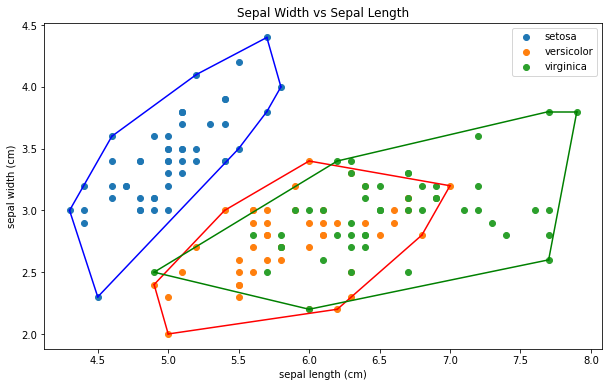

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import convexhull

data = datasets.load_iris()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()

(150, 5)
 
 
 


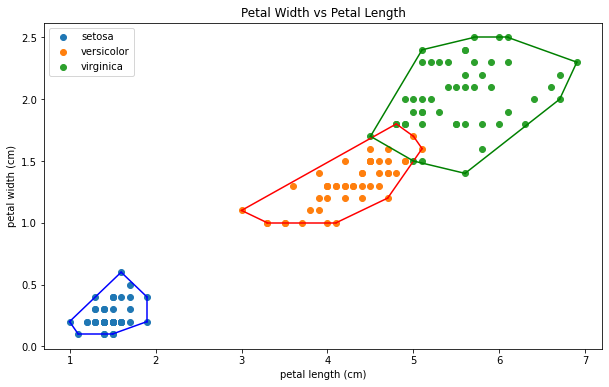

In [33]:
data = datasets.load_iris()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()

(178, 14)
 
 
 


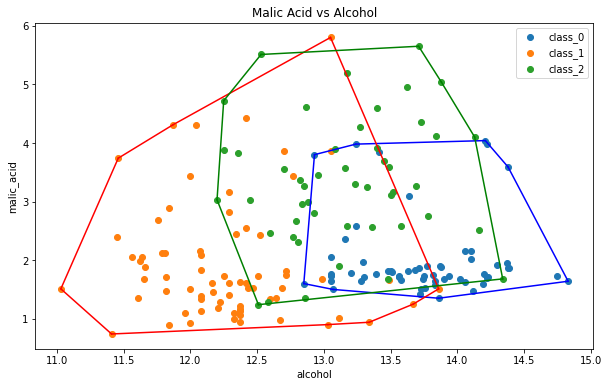

In [34]:
data = datasets.load_wine()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Malic Acid vs Alcohol')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
plt.legend()

(178, 14)
 
 
 


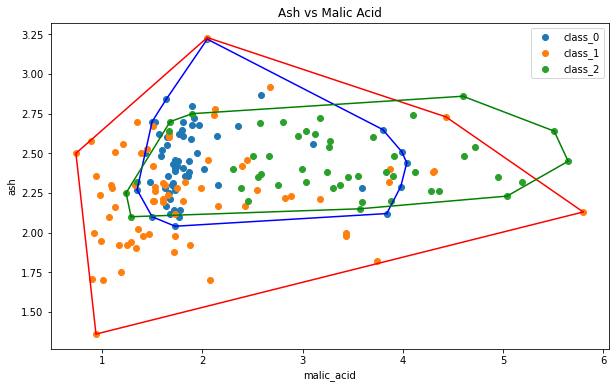

In [35]:
data = datasets.load_wine()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Ash vs Malic Acid')
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[1,2]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
plt.legend()

(178, 14)
 
 
 


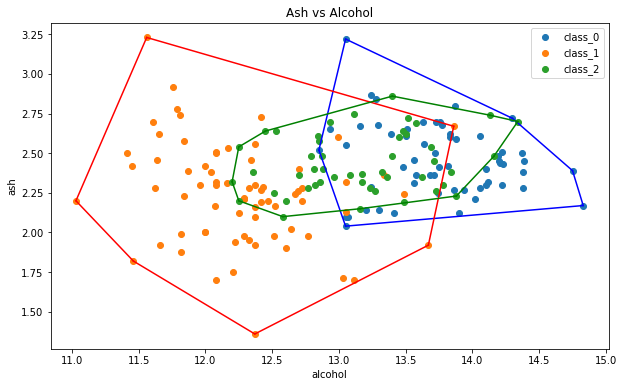

In [36]:
data = datasets.load_wine()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Ash vs Alcohol')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,2]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
plt.legend()

(569, 31)
 
 


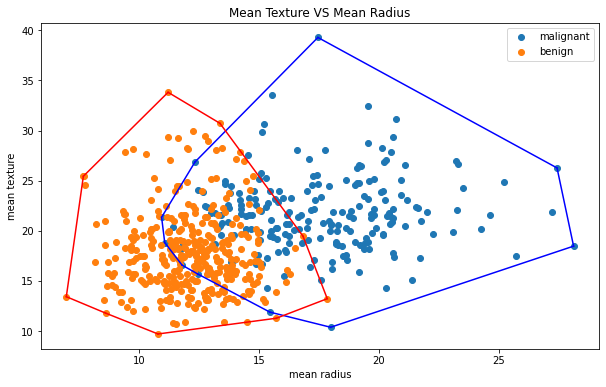

In [37]:
data = datasets.load_breast_cancer()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Texture VS Mean Radius')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()

(569, 31)
 
 


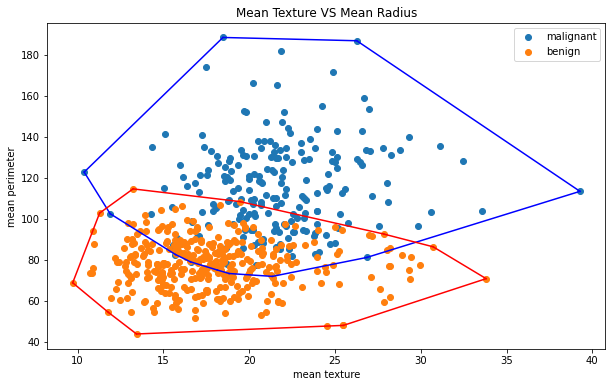

In [38]:
data = datasets.load_breast_cancer()
# Mengambil data dari database
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Perimeter VS Mean Texture')
plt.xlabel(data.feature_names[1])
plt.ylabel(data.feature_names[2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[1,2]].values
    # Mengubah numpy array menjadi list yang dapat diproses oleh fungsi hullfinal
    temp = bucket.tolist()
    hasil = convexhull.myConvexHull(temp)
    # Mengubah list kembali menjadi numpy agar bisa digambar
    hasil = np.array(hasil)
    print(" ")
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range (0,len(hasil)-1):
        plt.plot([hasil[j][0],hasil[j+1][0]], [hasil[j][1],hasil[j+1][1]], colors[i]) 
    plt.legend()